<a href="https://colab.research.google.com/github/arloera01-blip/AshlynL_DTSC3020_Fall2025/blob/main/final_exam_study_guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1 — Create Member ID
Write a Python function create_member_id(full_name) that creates a Library Member ID from a person’s full name.

Rules

Normalize the name: remove extra spaces, convert to lowercase, and split by spaces.
Use the last word as the last name (e.g., "John Ronald Reuel Tolkien" → last name tolkien).
Use the first letters of all earlier words as initials (e.g., jrr for the example above).
Construct the member ID in this exact format: lastname_initials (underscore between them; no spaces).
Examples

"Sara Amini" → amini_sa
"Mary Jane Watson" → watson_mj
"LINA" (single word) → use the word for both parts: lina_l
Part 2 — Test Scenario (run using your function) names = ["Sara Amini", "Ali", "Mary Jane", "John Smith", "LINA", "madonna", "sara amini"]

In [ ]:
def create_member_id(full_name):
    # Normalize: lowercase, strip extra spaces, split into words
    parts = full_name.lower().strip().split()

    # If only one word: use it for both the last name and the first letter
    if len(parts) == 1:
        last = parts[0]
        initials = parts[0][0]   # first letter of the single name
    else:
        last = parts[-1]                     # last word is last name
        initials = "".join(word[0] for word in parts[:-1])  # initials of previous words

    return f"{last}_{initials}"

names = ["Sara Amini", "Ali", "Mary Jane", "John Smith", "LINA", "madonna", "sara amini"]

for n in names:
    print(n, "→", create_member_id(n))

Sara Amini → amini_s
Ali → ali_a
Mary Jane → jane_m
John Smith → smith_j
LINA → lina_l
madonna → madonna_m
sara amini → amini_s


Question 2 — Movie Ticket Booth
Write a Python program that simulates a movie ticket booth using this price list:

prices = {"adult": 12.5, "child": 8, "senior": 9.5, "student": 10}
Program Requirements

Repeatedly ask the user to enter a ticket type or type done to finish.
Valid inputs: adult, child, senior, student, or done.
If the ticket type exists, add its price to a running total and print a confirmation message.
If it doesn’t exist, print "Invalid ticket type".
When the user types done, stop and show:
Subtotal (sum of valid ticket prices)
Tax = 8% of subtotal
Final total = subtotal + tax

In [ ]:
prices = {"adult": 12.5, "child": 8, "senior": 9.5, "student": 10}

subtotal= 0.0

while True:
  type= input("Enter a ticket type or type done to finish: ")
  if type == "done":
    break
  elif type in prices:
    subtotal+= prices[type]
    print(f"Adding {type} to basket, Subtotal:{subtotal}")
  else:
    print("Invalid ticket type")

tax = round(subtotal * 0.08, 2)
total= round(subtotal+ tax, 2)

print(f"Subtotal: {subtotal}")
print(f"Tax: {tax}")
print(f"Total: {total}")

Enter a ticket type or type done to finish: adult
Adding adult to basket, Subtotal:12.5
Enter a ticket type or type done to finish: child
Adding child to basket, Subtotal:20.5
Enter a ticket type or type done to finish: done
Subtotal: 20.5
Tax: 1.64
Total: 22.14


Question 3 — Student Grade Analyzer
Write a Python function analyze_grades(grades) that takes a list of numbers (0–100) and returns three values:

average grade
highest grade
lowest grade
Constraints

Use a function and return statement(s).
Do not use external libraries.

In [ ]:
def analyze_grades(grades):
    average = round(sum(grades) / len(grades), 2)
    highest= max(grades)
    lowest= min(grades)
    return average, highest, lowest

sample = [88, 92, 79, 93, 85, 90, 72]
print(analyze_grades(sample))

(85.57, 93, 72)


Question 4 — PIN Verification
Write a Python program that simulates an ATM PIN verification system.

Requirements

The correct PIN is 4321.
The user has at most 3 attempts to enter the correct PIN.
If the PIN is correct: print Access granted. and stop.
If all 3 attempts fail: print Card blocked.
After each wrong attempt, also print the counter in the form Wrong (x/3).

In [ ]:
PIN = "4321"

attempts = 0
while attempts < 3:
  pin = input("Please enter your PIN: ")
  if pin == PIN:
    print("Access granted.")
    break
  else:
    attempts += 1
    print(f"Wrong ({attempts}/3)")

if attempts == 3:
  print("Card blocked.")

open a file and read its full contents, then use try/except for error handling, then trims whitespace/newlines, then print results.

In [ ]:
filename= 'pi_digits.txt'

try:
  with open(filename) as f:
      contents= f.read()
  print(contents.rstrip())
except FileNotFoundError:
  print(f"Sorry, the file {filename} does not exist.")


Sorry, the file pi_digits.txt does not exist.


creates/overwrite a file and write text, then print results.

In [ ]:
filename= 'programming.txt'
with open(filename, 'w') as f:
  f.write("I love programming.\n")
  f.write("I love creating new games.\n")
print(f"Wrote sample lines to {filename!r}")

Wrote sample lines to 'programming.txt'


In [ ]:
filname= 'programming.txt'
with open(filename) as f:
  print("Programming contents:")
  print(f.read())


Programming contents:
I love programming.
I love creating new games.



alice reading and write

In [ ]:
filename = 'alice.txt'
try:  # start try block (may raise error)
    with open(filename, encoding='utf-8') as f:  # open file safely for reading
        contents = f.read()  # read entire file content
except FileNotFoundError:  # handle a specific exception
    # Silently skip
    pass
else:  # fallback branch
    print(contents[:200])  # display output

In [ ]:
def count_words(filename):  # define function count_words
    """Print the number of words found in a text file."""
    try:  # start try block
        with open(filename, encoding='utf-8') as f:  # open file safely for reading
            contents = f.read()  # read entire file content
    except FileNotFoundError:  # handle a specific exception
        print(f"Warning: file {filename!r} not found.")  # display output
    else:  # fallback branch
        words = contents.split()
        print(f"{filename}: {len(words)} words")  # display output

for name in ['alice.txt', 'moby_dick.txt', 'little_women.txt']:  # loop over items
    count_words(name)


Demo 1 — Books to Scrape (static site)
This demo shows extracting Title, Price, Availability, Rating from a static educational site using requests + BeautifulSoup and saving results to CSV.

In [ ]:
!pip install --quiet requests beautifulsoup4 pandas lxml


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url= 'http://books.toscrape.com/catalogue/page-1.html'
resp= requests.get(url, timeout=10)
soup= BeautifulSoup(resp.text, 'html.parser')

books= []

for item in soup.select('article.product_pod'):
  title= item.h3.a['title'].strip()
  price= item.select_one('p.price_color').text.strip()
  availability = item.select_one('p.instock.availability').text.strip()
  rating_classes= item.select_one('p.star-rating')['class']
  rating= [r for r in rating_classes if r != 'star-rating'][0]
  books.append({'Title': title, 'Price': price, 'Availability': availability, 'Rating': rating})

df_books= pd.DataFrame(books)
df_books.to_csv('books.csv', index=False)
print("saved books_pages1.csv - rows", len(df_books))
df_books.head(10)

saved books_pages1.csv - rows 20


,Title,Price,Availability,Rating
0,A Light in the Attic,Â£51.77,In stock,Three
1,Tipping the Velvet,Â£53.74,In stock,One
2,Soumission,Â£50.10,In stock,One
3,Sharp Objects,Â£47.82,In stock,Four
4,Sapiens: A Brief History of Humankind,Â£54.23,In stock,Five
5,The Requiem Red,Â£22.65,In stock,One
6,The Dirty Little Secrets of Getting Your Dream...,Â£33.34,In stock,Four
7,The Coming Woman: A Novel Based on the Life of...,Â£17.93,In stock,Three
8,The Boys in the Boat: Nine Americans and Their...,Â£22.60,In stock,Four
9,The Black Maria,Â£52.15,In stock,One



Demo 2 — Quotes to Scrape (textual scraping)
This demo extracts textual content (quote text + author) from a static site designed for scraping practice

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

quotes_url= 'http://quotes.toscrape.com/page/1/'
resp= requests.get(quotes_url, timeout=10)
soup= BeautifulSoup(resp.text, 'html.parser')

quotes= []
for block in soup.select('div.quote'):
  text= block.select_one('span.text').text.strip()
  author= block.select_one('small.author').text.strip()
  tags = [t.text for t in block.select('div.tags a.tag')]  # associated tags
  quotes.append({'Quote': text, 'Author': author, 'Tags': ','.join(tags)})

df_quotes= pd.DataFrame(quotes)
df_quotes.to_csv('quotes.csv', index=False)
print('Saved quotes_page1.csv — rows:', len(df_quotes))
df_quotes.head()


Saved quotes_page1.csv — rows: 10


,Quote,Author,Tags
0,“The world as we have created it is a process ...,Albert Einstein,"change,deep-thoughts,thinking,world"
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"abilities,choices"
2,“There are only two ways to live your life. On...,Albert Einstein,"inspirational,life,live,miracle,miracles"
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"aliteracy,books,classic,humor"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"be-yourself,inspirational"


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install wbgapi

In [ ]:
import wbgapi as wb

In [ ]:
import pandas as pd

# Download/read directly from source:
wb = pd.read_csv(
    "https://raw.githubusercontent.com/fahadsultan/csc272/main/data/world_bank.csv",
    index_col=0
)

wb.head()

,Continent,Country,Primary completion rate: Male: % of relevant age group: 2015,Primary completion rate: Female: % of relevant age group: 2015,Lower secondary completion rate: Male: % of relevant age group: 2015,Lower secondary completion rate: Female: % of relevant age group: 2015,Youth literacy rate: Male: % of ages 15-24: 2005-14,Youth literacy rate: Female: % of ages 15-24: 2005-14,Adult literacy rate: Male: % ages 15 and older: 2005-14,Adult literacy rate: Female: % ages 15 and older: 2005-14,...,Access to improved sanitation facilities: % of population: 1990,Access to improved sanitation facilities: % of population: 2015,Child immunization rate: Measles: % of children ages 12-23 months: 2015,Child immunization rate: DTP3: % of children ages 12-23 months: 2015,Children with acute respiratory infection taken to health provider: % of children under age 5 with ARI: 2009-2016,Children with diarrhea who received oral rehydration and continuous feeding: % of children under age 5 with diarrhea: 2009-2016,Children sleeping under treated bed nets: % of children under age 5: 2009-2016,Children with fever receiving antimalarial drugs: % of children under age 5 with fever: 2009-2016,Tuberculosis: Treatment success rate: % of new cases: 2014,Tuberculosis: Cases detection rate: % of new estimated cases: 2015
0,Africa,Algeria,106.0,105.0,68.0,85.0,96.0,92.0,83.0,68.0,...,80.0,88.0,95.0,95.0,66.0,42.0,NaN,NaN,88.0,80.0
1,Africa,Angola,NaN,NaN,NaN,NaN,79.0,67.0,82.0,60.0,...,22.0,52.0,55.0,64.0,NaN,NaN,25.9,28.3,34.0,64.0
2,Africa,Benin,83.0,73.0,50.0,37.0,55.0,31.0,41.0,18.0,...,7.0,20.0,75.0,79.0,23.0,33.0,72.7,25.9,89.0,61.0
3,Africa,Botswana,98.0,101.0,86.0,87.0,96.0,99.0,87.0,89.0,...,39.0,63.0,97.0,95.0,NaN,NaN,NaN,NaN,77.0,62.0
5,Africa,Burundi,58.0,66.0,35.0,30.0,90.0,88.0,89.0,85.0,...,42.0,48.0,93.0,94.0,55.0,43.0,53.8,25.4,91.0,51.0


Bar plot using Pandas library
The pandas library is a powerful tool for data manipulation and analysis. This example will show you how to use pandas' native plotting tools to create informative bar charts.



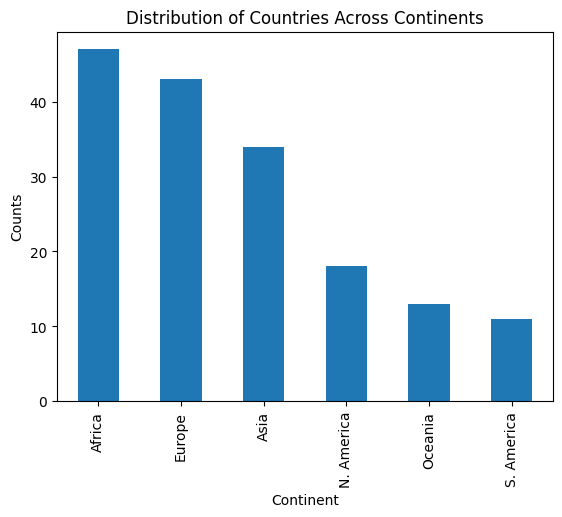

In [ ]:
wb["Continent"].value_counts().plot(kind='bar')
plt.ylabel("Counts")
plt.title("Distribution of Countries Across Continents")
plt.show()

Bar plot using seaborn

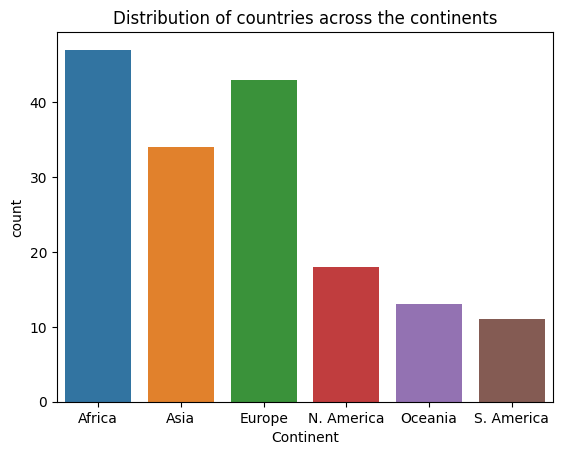

In [ ]:
sns.countplot(data=wb, x='Continent', hue='Continent')

plt.title("Distribution of countries across the continents");

Matplotlib histogram
A histogram groups continuous data into bins and shows how many values fall in each range.

It’s great for seeing a variable’s distribution: center, spread, skew, peaks, and outliers.

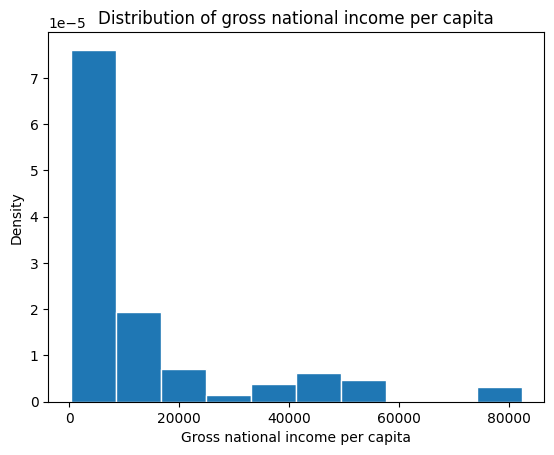

In [ ]:
gni= wb["Gross national income per capita, Atlas method: $: 2016"]
plt.hist(gni, density=True, edgecolor="white")

plt.xlabel("Gross national income per capita")
plt.ylabel("Density")
plt.title("Distribution of gross national income per capita");

Seaborn histogram
Now we want to compare the distribution of GNI per capita between groups

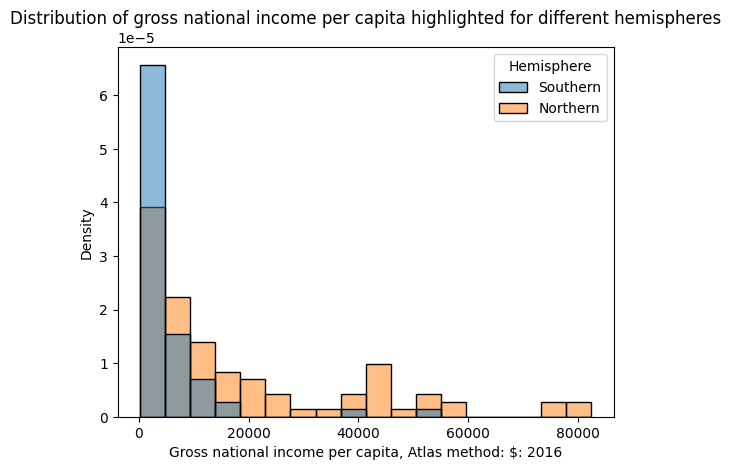

In [ ]:
north = ["Asia", "Europe", "N. America"]
south = ["Africa", "Oceania", "S. America"]
wb.loc[wb["Continent"].isin(north), "Hemisphere"] = "Northern"
wb.loc[wb["Continent"].isin(south), "Hemisphere"] = "Southern"

sns.histplot(data=wb, x="Gross national income per capita, Atlas method: $: 2016", hue="Hemisphere", stat="density")
plt.title("Distribution of gross national income per capita highlighted for different hemispheres");

matplotlib scatter
What it shows: Relationship between % growth per capita (2016) and female adult literacy (2005–2014).

Each dot = one country.

Single color; no automatic legend.

We add axis labels manually.

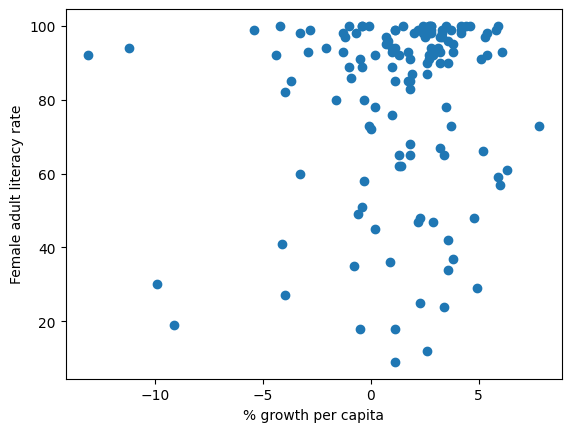

In [ ]:
plt.scatter(wb['per capita: % growth: 2016'], wb['Adult literacy rate: Female: % ages 15 and older: 2005-14'])
plt.xlabel("% growth per capita")
plt.ylabel("Female adult literacy rate");

Seaborn scatter (grouped by continent)
Same relationship, but hue="Continent" colors points by continent.

Seaborn adds a legend automatically and uses nicer defaults.

data=wb lets us reference columns by name (x=..., y=...).

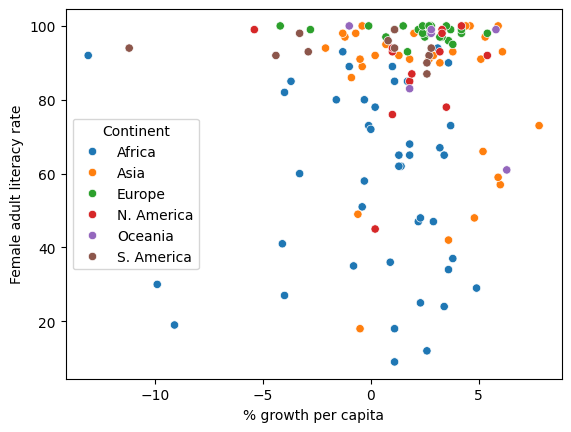

In [ ]:
sns.scatterplot(data=wb, x='per capita: % growth: 2016', \
                y='Adult literacy rate: Female: % ages 15 and older: 2005-14', hue="Continent")
plt.xlabel("% growth per capita")
plt.ylabel("Female adult literacy rate");

In this demo, we'll build an interactive Student Grade Tracker web app using Streamlit. The app lets users filter student grades by name, view subject-wise performance, calculate averages, and explore all student data in a table.

In [23]:
!pip install pandas streamlit pyngrok

In [34]:
%%writefile app.py
import streamlit as st
import pandas as pd

# Set page configuration
st.set_page_config(page_title="Student Grade Tracker - Extended", layout="wide")

# Title
st.title("📚 Student Grade Tracker - Extended Edition")
st.write("An enhanced app with advanced filtering and analytics!")

# Sample data
students_data = {
    "Name": ["Alice Johnson", "Bob Smith", "Carol White", "David Lee", "Emma Davis"],
    "Math": [92, 85, 88, 76, 95],
    "Science": [88, 90, 85, 82, 92],
    "English": [85, 88, 92, 88, 90],
    "History": [90, 82, 88, 85, 88]
}

df = pd.DataFrame(students_data)

Overwriting app.py


In [25]:
# Add Sidebar Filter (Append to app.py)

%%writefile -a app.py
# Sidebar filters
st.sidebar.header("Filter Options")
selected_student = st.sidebar.selectbox("Select a student:", df["Name"])

Appending to app.py


In [24]:
# Display Selected Student's Grades (Append to app.py)

%%writefile -a app.py
# Display grades for selected student
st.subheader(f"Grades for {selected_student}")
student_row = df[df["Name"] == selected_student].iloc[0]

# Create columns for subject grades
col1, col2, col3, col4 = st.columns(4)
with col1:
    st.metric("Math", student_row["Math"])
with col2:
    st.metric("Science", student_row["Science"])
with col3:
    st.metric("English", student_row["English"])
with col4:
    st.metric("History", student_row["History"])


Appending to app.py


In [26]:
# Calculate & Display Average (Append to app.py)

%%writefile -a app.py
# Calculate and display average grade
subjects = ["Math", "Science", "English", "History"]
average = student_row[subjects].mean()
st.write(f"**Average Grade: {average:.1f}**")


Appending to app.py


In [27]:
%%writefile -a app.py
# Show all students in a table
st.subheader("All Students")
st.dataframe(df, use_container_width=True)

Appending to app.py


In [28]:
# Add Grade Calculator (Append to app.py)

%%writefile -a app.py
# Add a simple grade calculator
st.subheader("Grade Calculator")
grades = st.slider("Enter test grades:", 0, 100, (50, 90))
calculated_average = (grades[0] + grades[1]) / 2
st.info(f"Average of {grades[0]} and {grades[1]}: **{calculated_average:.1f}**")

Appending to app.py


In [33]:
from pyngrok import ngrok
ngrok.set_auth_token("35cIw3T8zkgOH9YOr9jMg7XF36A_83WBJHNGBRqiMesi3X2WQ")

In [32]:
import subprocess, time
from pyngrok import ngrok

# Kill any previous Streamlit
!kill -9 $(lsof -t -i:8501) 2>/dev/null || true

# Start Streamlit app in background
subprocess.Popen(["streamlit", "run", "app.py", "--server.port", "8501"])
time.sleep(5)

# Open public tunnel
public_url = ngrok.connect(8501)
print("✅ Streamlit running at:", public_url)

✅ Streamlit running at: NgrokTunnel: "https://kevin-seminomadic-supposedly.ngrok-free.dev" -> "http://localhost:8501"


In [31]:
# Kill the Streamlit server (port 8501)
!kill -9 $(lsof -t -i:8501) 2>/dev/null || true

# Kill any active ngrok processes
!pkill -f ngrok 2>/dev/null || true

^C
